In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
raw_vehicles = pd.read_csv("Transportation_Network_Providers_-_Vehicles.csv", parse_dates=["MONTH_REPORTED"])
raw_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495648 entries, 0 to 1495647
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   MONTH_REPORTED         1495648 non-null  datetime64[ns]
 1   STATE                  1495648 non-null  object        
 2   MAKE                   1495648 non-null  object        
 3   MODEL                  1495648 non-null  object        
 4   COLOR                  1388566 non-null  object        
 5   YEAR                   1495648 non-null  int64         
 6   LAST_INSPECTION_MONTH  1474287 non-null  object        
 7   NUMBER_OF_TRIPS        1492880 non-null  float64       
 8   MULTIPLE_TNPS          1495648 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 92.7+ MB


In [35]:
#filter dataset for vehicles which have been driven and are registered in 2019
relevant_vehicles = raw_vehicles[(raw_vehicles["NUMBER_OF_TRIPS"] != 0.0) & (raw_vehicles["NUMBER_OF_TRIPS"].notna()) & (raw_vehicles["MONTH_REPORTED"].apply(lambda item: item.year) == 2019)]
relevant_vehicles

,MONTH_REPORTED,STATE,MAKE,MODEL,COLOR,YEAR,LAST_INSPECTION_MONTH,NUMBER_OF_TRIPS,MULTIPLE_TNPS
2,2019-11-01,IL,Bmw,3 Series,Silver,2005,2019-04,369.0,False
3,2019-05-01,IL,Volkswagen,Jetta,Silver,2009,2019-01,4.0,False
4,2019-04-01,IL,Nissan,Altima,Brown,2017,2018-08,102.0,False
6,2019-06-01,IL,Mazda,Mazda5,Gray,2008,2019-01,73.0,False
8,2019-05-01,IL,Chrysler,Pacifica,Silver,2006,2019-04,125.0,False
...,...,...,...,...,...,...,...,...,...
1495643,2019-06-01,IL,Hyundai,Elantra,White,2017,2019-06,180.0,False
1495644,2019-05-01,IL,Ford,Escape,Black,2014,2019-01,249.0,True
1495645,2019-12-01,IL,Toyota,Corolla,Silver,2019,2019-10,166.0,True
1495646,2019-12-01,IL,Nissan,Sentra,Black,2017,2019-08,346.0,False


In [36]:
#get number of manufaturers
make = relevant_vehicles.groupby('MAKE', group_keys=False).apply(lambda df: df.sample(1))
make.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 1314057 to 1339700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MONTH_REPORTED         54 non-null     datetime64[ns]
 1   STATE                  54 non-null     object        
 2   MAKE                   54 non-null     object        
 3   MODEL                  54 non-null     object        
 4   COLOR                  52 non-null     object        
 5   YEAR                   54 non-null     int64         
 6   LAST_INSPECTION_MONTH  53 non-null     object        
 7   NUMBER_OF_TRIPS        54 non-null     float64       
 8   MULTIPLE_TNPS          54 non-null     bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.8+ KB


In [37]:
#get table to filter for electric vehicles
models = relevant_vehicles.groupby('MODEL', group_keys=False).apply(lambda df: df.sample(1))
models

,MONTH_REPORTED,STATE,MAKE,MODEL,COLOR,YEAR,LAST_INSPECTION_MONTH,NUMBER_OF_TRIPS,MULTIPLE_TNPS
1378201,2019-12-01,IL,Bmw,1 Series,Silver,2015,2019-08,13.0,False
1258602,2019-12-01,IL,Audi,100,Silver,2015,2019-09,444.0,False
49108,2019-02-01,IL,Mazda,121,Silver,2012,2019-04,264.0,False
731330,2019-07-01,IL,Honda,150,NaN,2017,2019-01,26.0,False
261657,2019-01-01,IL,Ram,1500,Black,2015,2018-06,4.0,False
...,...,...,...,...,...,...,...,...,...
199443,2019-03-01,IL,Gmc,Yukon Hybrid,Black,2010,2019-02,6.0,False
384105,2019-01-01,IL,Gmc,Yukon Xl,Black,2017,2018-05,12.0,True
529260,2019-06-01,IL,Gmc,Yukon Xl Denali,Black,2017,2018-07,18.0,False
237364,2019-02-01,IL,Acura,Zdx,Silver,2010,2019-03,182.0,True


In [38]:
# List of electric vehicles:
#Audi A3 Sportback E-Tron
#Chevrolet	Bolt
#Chevrolet	Bolt Ev
#Honda	Clarity Electric
#Honda  Fit Ev
#Hyundai	Ioniq Electric
#Kia	Niro Ev
#Kia	Soul Ev
#Nissan	Leaf
#Nissan Leaf Ev
#Tesla	Model 3
#Tesla  Model 3 Ev
#Tesla	Model S
#Tesla	Model X

#select only electronic vehicles
electric_vehicles = relevant_vehicles[
    relevant_vehicles["MODEL"].isin([
        "A3 Sportback E-Tron",
        "Bolt",
        "Bold Ev",
        "Clarity Electric",
        "Fit Ev",
        "Ioniq Electric",
        "Niro Ev",
        "Soul Ev",
        "Leaf",
        "Leaf Ev",
        "Model 3",
        "Model 3 Ev",
        "Model S",
        "Model X"])]
electric_vehicles.head(3)

,MONTH_REPORTED,STATE,MAKE,MODEL,COLOR,YEAR,LAST_INSPECTION_MONTH,NUMBER_OF_TRIPS,MULTIPLE_TNPS
949,2019-04-01,IN,Tesla,Model S,Silver,2015,2018-08,4.0,False
1278,2019-06-01,IL,Nissan,Leaf,Silver,2015,2019-04,357.0,True
1896,2019-06-01,IL,Kia,Soul Ev,Red,2019,2019-04,84.0,False


In [39]:
print("Aggregated sum of trips by electric vehicles:")
ev_sum = electric_vehicles["NUMBER_OF_TRIPS"].agg("sum")
print(ev_sum)
print("Aggregated sum of all vehicles:")
sum = relevant_vehicles["NUMBER_OF_TRIPS"].agg("sum")
print(sum)
print("---------------------------------------------")
print("Ratio of Ev trips of whole trips")
print(ev_sum/sum)

Aggregated sum of trips by electric vehicles:
89493.0
Aggregated sum of all vehicles:
119544129.0
---------------------------------------------
Ratio of Ev trips of whole trips
0.0007486189472341214


In [129]:
#handmade consumption table
consumption = pd.read_csv("ev_model_consumption_details.csv", sep=";")
consumption.head(3)

,Make,Model,rated MPG city,rated average kWh/100mile,rated range,est. battery capacity,est. consumption kWh per 100 miles city
0,Audi,A3 Sportback E-Tron,76,46,204,"93,84","44,34"
1,Chevrolet,Bolt,131,28,238,"66,64","25,73"
2,Chevrolet,Bolt Ev,131,28,238,"66,64","25,73"


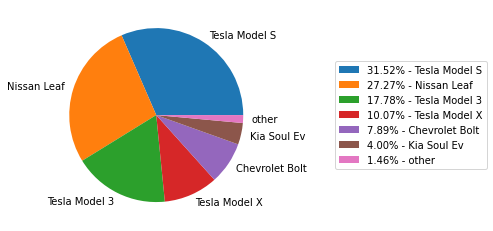

In [131]:
#get distribution of cars
## agg duplicate names
electric_vehicles_model_adjusted = electric_vehicles.copy()
electric_vehicles_model_adjusted["MODEL"] = electric_vehicles_model_adjusted["MODEL"].apply(lambda x:"Leaf" if x == "Leaf Ev" else x)
electric_vehicles_model_adjusted["MODEL"] = electric_vehicles_model_adjusted["MODEL"].apply(lambda x:"Model 3" if x == "Model 3 Ev" else x)
# number of trips per model
electric_vehicles_model_adjusted["full name"] = [x + " " + y for x,y in zip(electric_vehicles_model_adjusted["MAKE"], electric_vehicles_model_adjusted["MODEL"])]
by_model = electric_vehicles_model_adjusted.groupby("full name")["NUMBER_OF_TRIPS"].agg("sum")
total_trips = electric_vehicles_model_adjusted["NUMBER_OF_TRIPS"].agg("sum")
# agg models with less than 1% of trips into "other" group for display
by_model = by_model.to_frame()
by_model["percent"] = by_model["NUMBER_OF_TRIPS"].apply(lambda x:(x/total_trips*100))
by_model_pie = by_model.copy()
by_model_pie["label"] = by_model_pie.index.to_series()
by_model_pie.loc[by_model_pie['percent'] < 1, 'label'] = 'other'
by_model_pie = by_model_pie.groupby("label").agg("sum")
by_model_pie = by_model_pie.sort_values(by="percent",ascending=False)
plt.pie(x=by_model_pie["percent"], labels=by_model_pie.index)
by_model_pie["percent_label"] = [x + '% - ' + y for x, y in zip(by_model_pie['percent'].apply(lambda x:'%.2f' % x), by_model_pie.index.to_series())]
plt.legend(by_model_pie["percent_label"], loc='center left',fontsize=10, bbox_to_anchor=(1.3, 0.5))
plt.show()

In [153]:
# get average consumption per 100 miles in
average_consumption_default_rated = 0
average_consumption_city_rated = 0
all_models = electric_vehicles_model_adjusted.groupby("MODEL")["NUMBER_OF_TRIPS"].agg("sum")
for model, number_trips in all_models.items():
    share = number_trips / total_trips
    rated = consumption[(consumption["Model"] == model)]["rated average kWh/100mile"].iloc[0]
    city_rated = consumption[(consumption["Model"] == model)]["est. consumption kWh per 100 miles city"].iloc[0]
    average_consumption_default_rated += rated.item() * share
    average_consumption_city_rated += float(city_rated.replace(",",".")) * share

print(f"The weighted average used kWh/100miles for highway + city rating is: {average_consumption_default_rated}")
print(f"The weighted average used kWh/100miles for city rating is: {average_consumption_city_rated}")

The weighted average used kWh/100miles for highway + city rating is: 30.12643446973506
The weighted average used kWh/100miles for city rating is: 28.093583185277062
